# Walmart sales forecast

### importing library


In [5]:
import pandas as pd
import numpy as np

#import statsmodels.tsa.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose  # Decomposition
from statsmodels.tsa.stattools import adfuller
#from stldecompose import decompose, forecast             # Decomposition & forecasting
#from statsmodels.tsa.holtwinters import ExponentialSmoothing #ETS Models

#from fbprophet import Prophet #you need to install fbprophet using pip install

import matplotlib.pyplot as plt
%matplotlib inline

### Reading data files

In [6]:
feature=pd.read_csv('data/features.csv')
stores=pd.read_csv('data/stores.csv')
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

In [7]:
feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [8]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [9]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [10]:
sales_data_1=pd.merge(feature,stores)

In [11]:
sales_data_1

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [12]:
# merging data frame-------feature,stores,train

sales_data=pd.merge(sales_data_1,train)

In [13]:
sales_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,93,2487.80
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,94,5203.31
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,95,56017.47
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,97,6817.48


In [14]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     150681 non-null  float64
 5   MarkDown2     111248 non-null  float64
 6   MarkDown3     137091 non-null  float64
 7   MarkDown4     134967 non-null  float64
 8   MarkDown5     151432 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Type          421570 non-null  object 
 13  Size          421570 non-null  int64  
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [15]:
sales_data['Date']=pd.to_datetime(sales_data['Date'])

In [72]:
# sales_data['Month']=sales_data['Date'].dt.month
# sales_data['Year']=sales_data['Date'].dt.year
# sales_data['Dayofweek']=sales_data['Date'].dt.dayofweek

In [16]:
sales_data.set_index(sales_data['Date'],inplace=True)

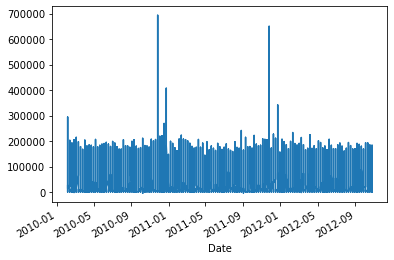

In [17]:
sales_data.Weekly_Sales.plot()

In [32]:
sales_data.rolling(window=4).mean()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0.0,151315.0,2.50,32305.9825
4,1.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0.0,151315.0,3.50,34132.2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0.0,118221.0,91.50,24694.9275
421566,45.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0.0,118221.0,92.50,19657.6750
421567,45.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0.0,118221.0,93.50,29579.3325
421568,45.0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0.0,118221.0,94.75,17631.5150


In [34]:
sales_data1=sales_data['Weekly_Sales']

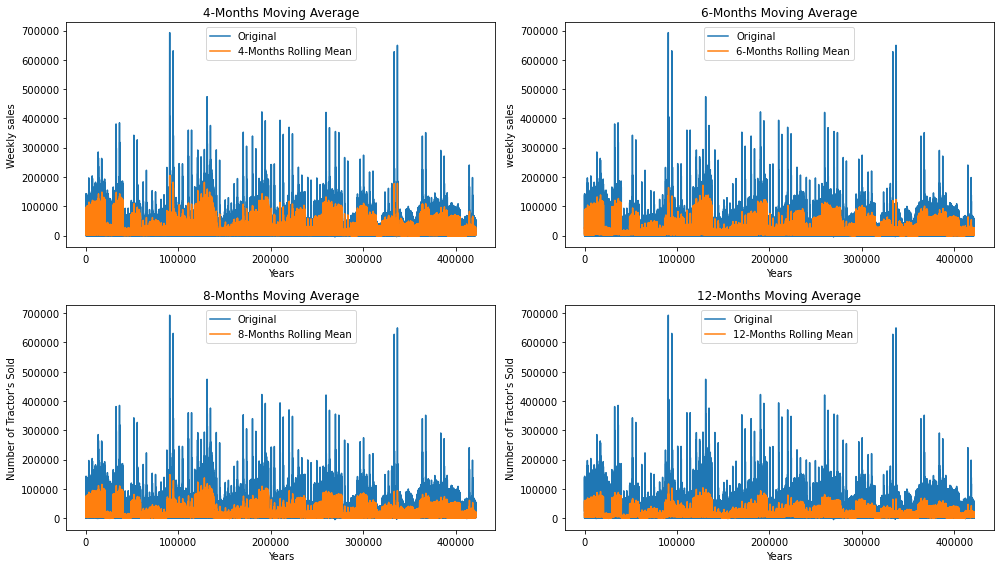

In [35]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales_data1.index, sales_data1, label='Original')
axes[0][0].plot(sales_data1.index, sales_data1.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Weekly sales")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(sales_data1.index, sales_data1, label='Original')
axes[0][1].plot(sales_data1.index, sales_data1.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("weekly sales")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(sales_data1.index, sales_data1, label='Original')
axes[1][0].plot(sales_data1.index, sales_data1.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(sales_data1.index, sales_data1, label='Original')
axes[1][1].plot(sales_data1.index, sales_data1.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [18]:
sales=train.groupby('Date')['Weekly_Sales'].sum()

In [19]:
sales.index=pd.to_datetime(sales.index)


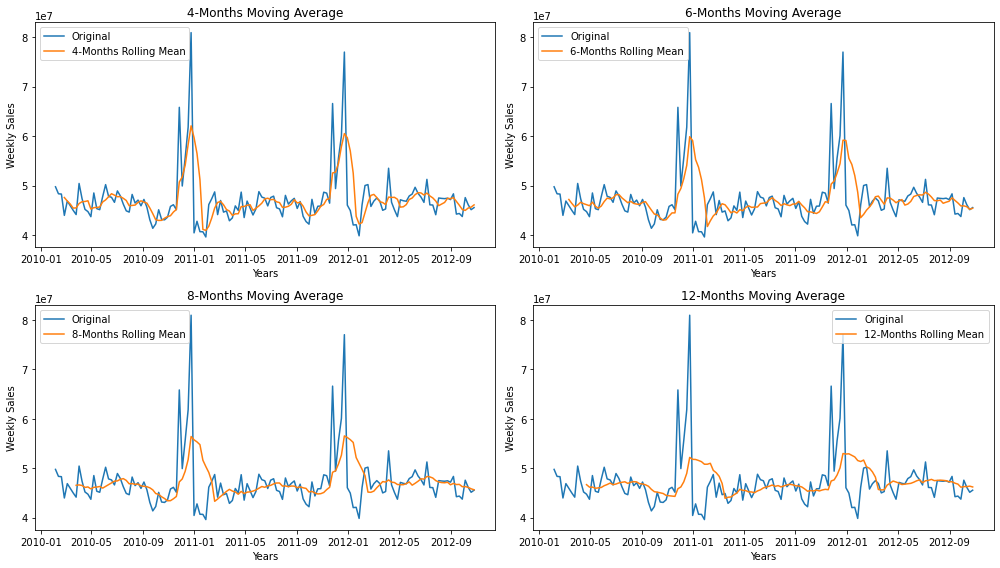

In [20]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales.index, sales, label='Original')
axes[0][0].plot(sales.index, sales.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Weekly Sales")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(sales.index, sales, label='Original')
axes[0][1].plot(sales.index, sales.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Weekly Sales")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(sales.index, sales, label='Original')
axes[1][0].plot(sales.index, sales.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Weekly Sales")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(sales.index, sales, label='Original')
axes[1][1].plot(sales.index, sales.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Weekly Sales")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

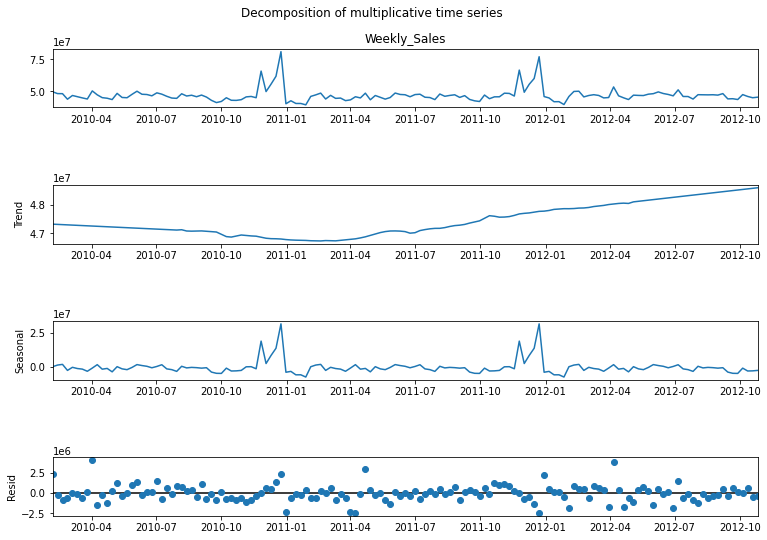

In [21]:
import statsmodels as sm
decomposition = sm.tsa.seasonal.seasonal_decompose(sales,extrapolate_trend=4)
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [22]:
decomp_output = pd.DataFrame(pd.concat([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid], axis=1))
decomp_output.columns = ['observed', 'Trend', 'Seasonal', 'Irregular']
decomp_output['TSI'] = decomp_output.Trend+decomp_output.Seasonal+decomp_output.Irregular

In [23]:
decomp_output


,observed,Trend,Seasonal,Irregular,TSI
Date,,,,,
2010-02-05,49750740.50,4.732521e+07,2.697488e+04,2.398560e+06,49750740.50
2010-02-12,48336677.63,4.731698e+07,1.259952e+06,-2.402517e+05,48336677.63
2010-02-19,48276993.78,4.730875e+07,1.761390e+06,-7.931448e+05,48276993.78
2010-02-26,43968571.13,4.730052e+07,-2.683161e+06,-6.487870e+05,43968571.13
2010-03-05,46871470.30,4.729229e+07,-4.028450e+05,-1.797522e+04,46871470.30
...,...,...,...,...,...
2012-09-28,43734899.40,4.851679e+07,-4.910182e+06,1.282901e+05,43734899.40
2012-10-05,47566639.31,4.853648e+07,-1.016339e+06,4.650123e+04,47566639.31
2012-10-12,46128514.25,4.855616e+07,-3.123369e+06,6.957201e+05,46128514.25


### Forecasting using decomposition with the help of STLDECOMPOSE PACKAGE

In [24]:
#pip install stldecompose
import stldecompose
# the main library has a small set of functionality
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)

ImportError: cannot import name '_maybe_get_pandas_wrapper_freq' from 'statsmodels.tsa.filters._utils' (C:\Users\RAKESH TL\anaconda3\lib\site-packages\statsmodels\tsa\filters\_utils.py)

In [25]:
import os
os.path

<module 'ntpath' from 'C:\\Users\\RAKESH TL\\anaconda3\\lib\\ntpath.py'>

In [156]:
import statsmodels.tsa.seasonal.STL

ModuleNotFoundError: No module named 'statsmodels.tsa.seasonal.STL'; 'statsmodels.tsa.seasonal' is not a package

In [26]:
### single exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# our guessed parameters
alpha = 0.4
beta = 0.2
gamma = 0.01

# initialise model
ets_model = ExponentialSmoothing(sales, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

ModuleNotFoundError: No module named 'statsmodels.tsa.exponential_smoothing._ets_smooth'

In [161]:
# forecast p months ahead
p_ahead = 36
yh = ets_fit.forecast(p_ahead)

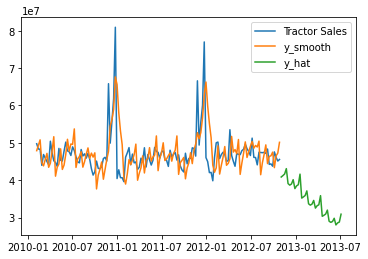

In [162]:
# plot the y, y_smoothed and y_hat ts'
plt.plot(sales, label='Tractor Sales')
plt.plot(ets_fit.fittedvalues, label='y_smooth')
plt.plot(yh, label='y_hat')

plt.legend()
plt.show()

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
adfuller(sales)

(-5.908297957186321,
 2.67597915898623e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 4314.46014989216)

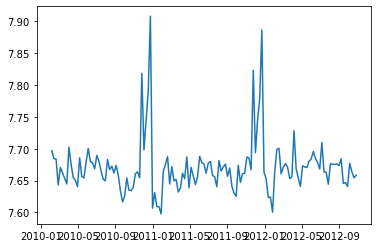

In [29]:
sales_ts_log = np.log10(sales)
plt.plot(sales_ts_log)

In [30]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.332826e+00
p-value                        2.878283e-08
#lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [31]:
sales.head()

Date
2010-02-05    49750740.50
2010-02-12    48336677.63
2010-02-19    48276993.78
2010-02-26    43968571.13
2010-03-05    46871470.30
Name: Weekly_Sales, dtype: float64

In [32]:
sales_ts_diff6 = sales.diff(6)
sales_ts_diff6.dropna(inplace=True)

In [33]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_diff6)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -5.536817
p-value                          0.000002
#lags Used                      10.000000
Number of Observations Used    126.000000
Critical Value (1%)             -3.483346
Critical Value (5%)             -2.884766
Critical Value (10%)            -2.579156
dtype: float64


In [34]:
sales_ts_log_diff1 = sales_ts_log.diff(1)
sales_ts_log_diff1.dropna(inplace=True)

In [171]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_log_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.747059e+00
p-value                        3.016343e-09
#lags Used                     7.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


In [172]:
sales_ts_log_diff2 = sales_ts_log.diff(2)
sales_ts_log_diff2.dropna(inplace=True)

In [173]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_log_diff2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.558182e+00
p-value                        3.059679e-11
#lags Used                     4.000000e+00
Number of Observations Used    1.360000e+02
Critical Value (1%)           -3.479372e+00
Critical Value (5%)           -2.883037e+00
Critical Value (10%)          -2.578234e+00
dtype: float64


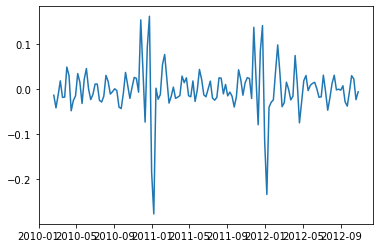

In [174]:
plt.plot(sales_ts_log_diff2)

In [35]:
sales_ts_diff15 = sales.diff(15)
sales_ts_diff15.dropna(inplace=True)

In [36]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_diff15)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -4.599219
p-value                          0.000130
#lags Used                      13.000000
Number of Observations Used    114.000000
Critical Value (1%)             -3.489058
Critical Value (5%)             -2.887246
Critical Value (10%)            -2.580481
dtype: float64


AttributeError: module 'statsmodels.graphics' has no attribute 'plot_acf'

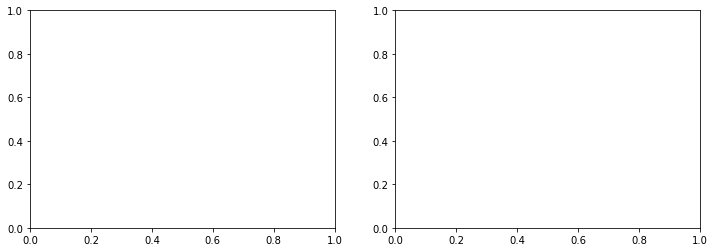

In [38]:
#AIRMA

fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
sm.graphics.plot_acf(sales, lags=30, ax=axes[0], alpha=0.5)
sm.graphics.plot_pacf(sales, lags=30, ax=axes[1], alpha=0.5, method='ols')
plt.tight_layout()

In [44]:
import sm.tsa.statespace.SARIMAX

ModuleNotFoundError: No module named 'sm'

In [41]:

model = statsmodels.api.tsa.statespace.SARIMAX(sales, order = (1,0,1), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

AttributeError: module 'statsmodels' has no attribute 'api'

In [46]:
!pip uninstall statsmodels

^C


In [188]:
results = model.fit()

In [189]:
print(results.summary())
                         
    
    

                                      SARIMAX Results                                      
Dep. Variable:                        Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood               -2205.880
Date:                             Wed, 14 Oct 2020   AIC                           4419.760
Time:                                     00:51:02   BIC                           4431.230
Sample:                                 02-05-2010   HQIC                          4424.421
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9992      0.004    234.263      0.000       0.991       1.008
ma.L1         -0.6405      

In [190]:
np.power(10, results.forecast(steps=36))

2012-11-02    inf
2012-11-09    inf
2012-11-16    inf
2012-11-23    inf
2012-11-30    inf
2012-12-07    inf
2012-12-14    inf
2012-12-21    inf
2012-12-28    inf
2013-01-04    inf
2013-01-11    inf
2013-01-18    inf
2013-01-25    inf
2013-02-01    inf
2013-02-08    inf
2013-02-15    inf
2013-02-22    inf
2013-03-01    inf
2013-03-08    inf
2013-03-15    inf
2013-03-22    inf
2013-03-29    inf
2013-04-05    inf
2013-04-12    inf
2013-04-19    inf
2013-04-26    inf
2013-05-03    inf
2013-05-10    inf
2013-05-17    inf
2013-05-24    inf
2013-05-31    inf
2013-06-07    inf
2013-06-14    inf
2013-06-21    inf
2013-06-28    inf
2013-07-05    inf
Freq: W-FRI, dtype: float64

In [193]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(2,3)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [192]:
import itertools  

In [194]:
pdq

[(0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [195]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,2)
P = Q = range(0, 2) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [196]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [224]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = statsmodels.api.tsa.statespace.SARIMAX(sales,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            #print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(2, 2, 2)x(1, 1, 1, 12)12 model - AIC:3962.8055184448367


In [198]:
import warnings

In [202]:
best_pdq

In [203]:
best_seasonal_pdq

In [351]:
best_model = statsmodels.api.tsa.statespace.SARIMAX(sales_ts_log_diff2,
                                      order=(1,1,1),
                                      seasonal_order=(0,0,0,12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

In [352]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  141
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 209.297
Date:                Thu, 15 Oct 2020   AIC                           -412.595
Time:                        00:16:57   BIC                           -403.813
Sample:                    02-19-2010   HQIC                          -409.026
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2035      0.045      4.522      0.000       0.115       0.292
ma.L1         -1.0000    694.978     -0.001      0.999   -1363.132    1361.132
sigma2         0.0027      1.900      0.001      0.9

In [353]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-09-14'), full_results=True)


In [354]:
pred_dynamic.predicted_mean

2012-09-14    0.001600
2012-09-21   -0.005924
2012-09-28   -0.008066
2012-10-05   -0.001445
2012-10-12    0.005952
2012-10-19    0.004607
2012-10-26   -0.004960
Freq: W-FRI, dtype: float64

In [355]:
forecast=np.power(10, pred_dynamic.predicted_mean)

In [356]:
np.power(10, pred_dynamic.predicted_mean)

2012-09-14    1.003690
2012-09-21    0.986452
2012-09-28    0.981598
2012-10-05    0.996679
2012-10-12    1.013800
2012-10-19    1.010665
2012-10-26    0.988643
Freq: W-FRI, dtype: float64

In [357]:

actual = sales['2012-09-14':]
actual

,Weekly_Sales
Date,
2012-09-14,44226038.65
2012-09-21,44354547.11
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25
2012-10-19,45122410.57
2012-10-26,45544116.29


In [358]:
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)

In [359]:
print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE_last1year, 4)))

The Mean Absolute percentage error of our forecast for last two years is 2012-09-14 00:00:00   NaN
2012-09-21 00:00:00   NaN
2012-09-28 00:00:00   NaN
2012-10-05 00:00:00   NaN
2012-10-12 00:00:00   NaN
2012-10-19 00:00:00   NaN
2012-10-26 00:00:00   NaN
Weekly_Sales          NaN
dtype: float64


In [360]:
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 2012-09-14 00:00:00   NaN
2012-09-21 00:00:00   NaN
2012-09-28 00:00:00   NaN
2012-10-05 00:00:00   NaN
2012-10-12 00:00:00   NaN
2012-10-19 00:00:00   NaN
2012-10-26 00:00:00   NaN
Weekly_Sales          NaN
dtype: float64
The ROOT Mean Squared Error of our forecasts is 2012-09-14 00:00:00   NaN
2012-09-21 00:00:00   NaN
2012-09-28 00:00:00   NaN
2012-10-05 00:00:00   NaN
2012-10-12 00:00:00   NaN
2012-10-19 00:00:00   NaN
2012-10-26 00:00:00   NaN
Weekly_Sales          NaN
dtype: float64


In [361]:
np.power(10, best_results.forecast(steps=12))

2012-11-02    0.996713
2012-11-09    0.998633
2012-11-16    0.999024
2012-11-23    0.999104
2012-11-30    0.999120
2012-12-07    0.999123
2012-12-14    0.999124
2012-12-21    0.999124
2012-12-28    0.999124
2013-01-04    0.999124
2013-01-11    0.999124
2013-01-18    0.999124
Freq: W-FRI, dtype: float64

In [362]:
from pmdarima.arima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [363]:

step_wise=auto_arima(train_y, 
 exogenous= train_X,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

NameError: name 'auto_arima' is not defined

In [364]:
import pyramids 

ImportError: attempted relative import with no known parent package

In [365]:
os.path

<module 'ntpath' from 'C:\\Users\\RAKESH TL\\anaconda3\\lib\\ntpath.py'>

In [366]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [367]:
n_steps = 36
idx = pd.date_range(sales.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [368]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2012-11-01,0.996713,0.786558,1.263019,0.786558,1.263019
2012-12-01,0.998633,0.783996,1.272032,0.783996,1.272032
2013-01-01,0.999024,0.784084,1.272887,0.784084,1.272887
2013-02-01,0.999104,0.784126,1.273020,0.784126,1.273020
2013-03-01,0.999120,0.784136,1.273046,0.784136,1.273046


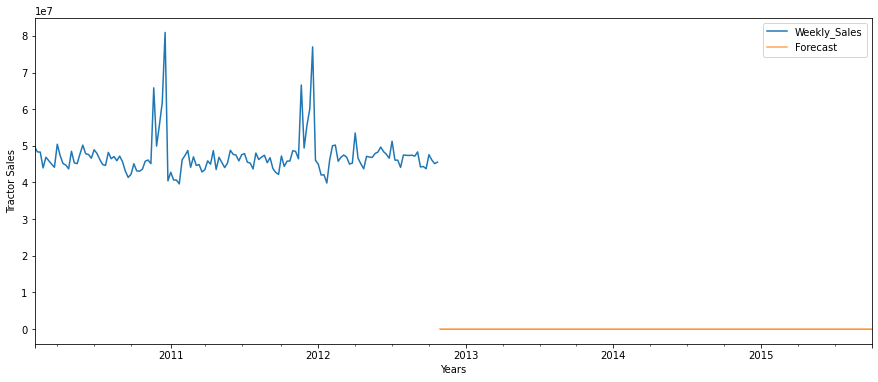

In [369]:
# plot the forecast along with the confidence band
axis = sales.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

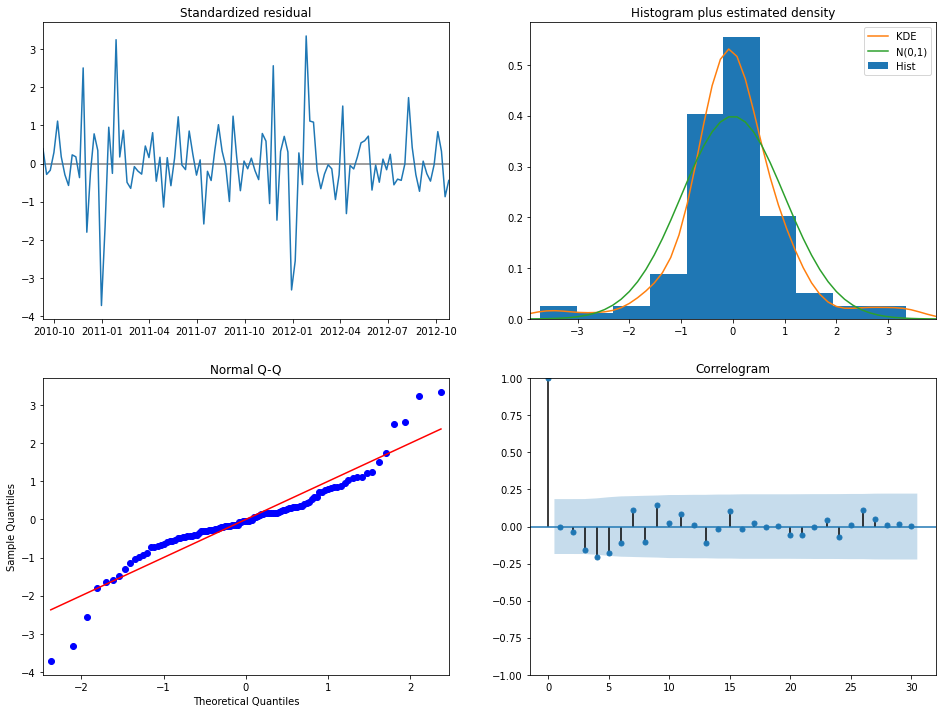

In [347]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

In [348]:
### single exponential smoothing/ ETS
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# our guessed parameters
alpha = 0.4
beta = 0.2
gamma = 0.01

# initialise model
ets_model = ExponentialSmoothing(sales, trend='add', seasonal='add', seasonal_periods=12)
#ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
ets_fit = ets_model.fit(optimized=True)

In [349]:

# forecast p months ahead
p_ahead = 36
yh = ets_fit.forecast(p_ahead)

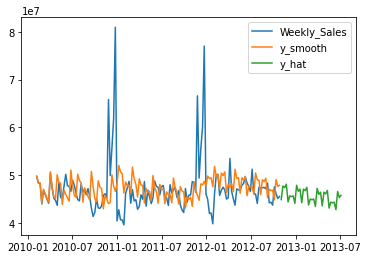

In [350]:
# plot the y, y_smoothed and y_hat ts'
plt.plot(sales, label='Weekly_Sales')
plt.plot(ets_fit.fittedvalues, label='y_smooth')
plt.plot(yh, label='y_hat')

plt.legend()
plt.show()

In [1]:
sales_ts_diff6 = sales.diff(6)
sales_ts_diff6.dropna(inplace=True)

NameError: name 'sales' is not defined

In [2]:
sales_data

NameError: name 'sales_data' is not defined